In [97]:
import sempy.fabric as Fabric
import pandas as pd

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 121, Finished, Available, Finished)

In [98]:
Fabric.list_datasets()

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 122, Finished, Available, Finished)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,sm-demo,bcc69bad-b4cb-4c04-8cf0-32e2ae2ed566,2024-08-24 18:52:26,NaT
1,lakehouse_demo,b0a780bc-b913-426b-835a-6c8c2968bfe6,2021-02-12 23:00:58,NaT


In [99]:
workspace_name = 'My workspace'
report_name = 'sm-demo'
semantic_model_name = 'sm-demo'

df_reports = Fabric.list_reports(workspace=workspace_name)
df_reports
report_id = df_reports[df_reports['Name']==report_name]['Id'].iloc[0]

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 123, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_utils/_pandas_utils.py:148: UserWarning: Missing columns from backend: ['isFromPbix']
  warnings.warn(UserWarning(f"Missing columns from backend: {missing_columns}"))


In [100]:
from powerbiclient import Report
report = Report(group_id=None, report_id=report_id)
report

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 124, Finished, Available, Finished)

Report()

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 140, Finished, Available, Finished)

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 141, Finished, Available, Finished)

In [101]:
Fabric.list_tables(dataset=semantic_model_name)

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 125, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type
0,DimDate,,False,,Table
1,DimCustomer,,False,,Table
2,DimProduct,,False,,Table
3,FactSalesOrder,,False,,Table
4,Items,,False,,Table
5,Items Count,,False,,Calculated Table


In [102]:
df_columns = Fabric.list_columns(dataset=semantic_model_name)
df_columns

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 126, Finished, Available, Finished)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Alternate Of Base Column,Alternate Of Base Table,Modified Time
0,DimDate,DateKey,,Data,Int64,False,0,DateKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
1,DimDate,DateAltKey,,Data,DateTime,False,Long Date,DateAltKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08
2,DimDate,DayOfWeek,,Data,Int64,False,0,DayOfWeek,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
3,DimDate,WeekDayName,,Data,String,False,,WeekDayName,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08
4,DimDate,DayOfMonth,,Data,Int64,False,0,DayOfMonth,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
5,DimDate,Month,,Data,Int64,False,0,Month,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
6,DimDate,MonthName,,Data,String,False,,MonthName,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08
7,DimDate,Year,,Data,Int64,False,0,Year,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
8,DimCustomer,CustomerKey,,Data,Int64,False,0,CustomerKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:37
9,DimCustomer,CustomerAltKey,,Data,String,False,,CustomerAltKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08


In [103]:
Fabric.refresh_tom_cache()
df_measures = Fabric.list_measures(dataset=semantic_model_name)
df_measures[["Measure Name","Measure Expression","Measure Data Type","Measure Description","Format String Definition"]]

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 127, Finished, Available, Finished)

,Measure Name,Measure Expression,Measure Data Type,Measure Description,Format String Definition
0,Products,DISTINCTCOUNT(DimProduct[ProductKey]),Int64,,None
1,Total Sales,SUM(FactSalesOrder[SalesTotal]),Double,,None


In [104]:
from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 128, Finished, Available, Finished)

In [105]:
relationships = Fabric.list_relationships(semantic_model_name)
relationships

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 129, Finished, Available, Finished)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,FactSalesOrder,ProductKey,DimProduct,ProductKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,AutoDetected_ebe1e8c7-d811-4fbf-b827-5676e6608517
1,m:1,FactSalesOrder,CustomerKey,DimCustomer,CustomerKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,5304b635-0994-2fea-e68f-9076e16b6e02
2,m:1,FactSalesOrder,SalesOrderDateKey,DimDate,DateKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,835fb548-1fab-cc7b-6414-618b236184de


StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 130, Finished, Available, Finished)

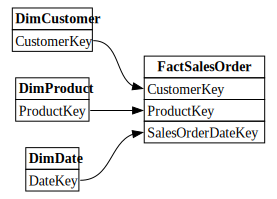

In [106]:
plot_relationship_metadata(relationships)

In [107]:
df_sales = Fabric.read_table(dataset=semantic_model_name, table='FactSalesOrder')
df_sales.head()

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 131, Finished, Available, Finished)

,SalesOrderKey,SalesOrderDateKey,ProductKey,CustomerKey,Quantity,SalesTotal
0,1237,20210102,831,281,10,3488.0
1,1258,20210105,711,29489,10,350.0
2,1260,20210106,780,625,10,23200.0
3,1267,20210107,815,30107,10,607.0
4,1287,20210110,973,696,10,17010.0


In [108]:
df_sales.to_lakehouse_table(name='sales', mode='overwrite')

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 132, Finished, Available, Finished)

In [109]:
from pyspark.sql.functions import *
df_lakehouse = spark.read.table('sales')
display(df_lakehouse.head(5))

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 133, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6c5ef85c-9757-4b0a-91b3-02122326dbec)

In [110]:
df_lakehouse = df_lakehouse.withColumn('SalesOrderDateKey', col('SalesOrderDateKey').cast('string'))

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 134, Finished, Available, Finished)

In [111]:
df_lakehouse = df_lakehouse.withColumn("Date", to_date(unix_timestamp(col("SalesOrderDateKey"), "yyyyMMdd").cast("timestamp")))
df_lakehouse.show()

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 135, Finished, Available, Finished)

+-------------+-----------------+----------+-----------+--------+----------+----------+
|SalesOrderKey|SalesOrderDateKey|ProductKey|CustomerKey|Quantity|SalesTotal|      Date|
+-------------+-----------------+----------+-----------+--------+----------+----------+
|         1241|         20210102|       724|      29616|      11|    3709.0|2021-01-02|
|         1273|         20210108|       860|        119|      11|     269.0|2021-01-08|
|         1277|         20210108|       770|        426|      11|    8613.0|2021-01-08|
|         1280|         20210109|       834|        674|      11|    6543.0|2021-01-09|
|         1334|         20210121|       821|        394|      11|    2398.0|2021-01-21|
|         1370|         20210127|       720|      30064|      11|   15747.0|2021-01-27|
|         1392|         20210131|       819|        437|      11|    2732.0|2021-01-31|
|         1432|         20210206|       993|      29900|      11|    5940.0|2021-02-06|
|         1499|         20210216

In [112]:
df_lakehouse = df_lakehouse.withColumn("Year", year(col("Date"))) \
    .withColumn("Month", month(col("Date"))) \
    .withColumn("Day", dayofmonth(col("Date")))

df_lakehouse_agg = df_lakehouse.groupBy('Year', 'Month').agg(sum('SalesTotal').alias('TotalSales'))

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 136, Finished, Available, Finished)

In [113]:
display(df_lakehouse_agg.head(5))

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 137, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5ebe7938-bafb-4849-86bc-40489de7dde8)

In [114]:
df_semantic_model = (
    Fabric.evaluate_measure(
        workspace=workspace_name,
        dataset=semantic_model_name,
        groupby_columns=["'DimDate'[Year]", "'DimDate'[Month]"],
        measure='Total Sales'
    )
)

df_semantic_model

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 138, Finished, Available, Finished)

,Year,Month,Total Sales
0,<NA>,<NA>,10284.0
1,2021,1,687029.0
2,2021,2,836937.0
3,2021,3,869863.0
4,2021,4,916273.0
5,2021,5,961241.0
6,2021,6,659677.0
7,2021,7,572189.0
8,2021,8,794832.0
9,2021,9,929086.0


In [115]:
#prepare for prophit
df_semantic_model = df_semantic_model.dropna()
df_semantic_model['ds'] = pd.to_datetime(df_semantic_model[['Year', 'Month']].assign(Day = 1))
df_semantic_model['y'] = df_semantic_model['Total Sales']

df_semantic_model.head()

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 139, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_metadata/_mdataframe.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result = attr(*args, **kwargs)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_metadata/_mdataframe.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result = attr(*args, **kwargs)


,Year,Month,Total Sales,ds,y
1,2021,1,687029.0,2021-01-01,687029.0
2,2021,2,836937.0,2021-02-01,836937.0
3,2021,3,869863.0,2021-03-01,869863.0
4,2021,4,916273.0,2021-04-01,916273.0
5,2021,5,961241.0,2021-05-01,961241.0


In [117]:
features = ['ds', 'y']
df_semantic_model = df_semantic_model[features]

df_semantic_model

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 143, Finished, Available, Finished)

,ds,y
1,2021-01-01,687029.0
2,2021-02-01,836937.0
3,2021-03-01,869863.0
4,2021-04-01,916273.0
5,2021-05-01,961241.0
6,2021-06-01,659677.0
7,2021-07-01,572189.0
8,2021-08-01,794832.0
9,2021-09-01,929086.0
10,2021-10-01,614116.0


In [118]:
from prophet import Prophet


StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 144, Finished, Available, Finished)

In [119]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_semantic_model[['ds', 'y']])

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 145, Finished, Available, Finished)

02:18:13 - cmdstanpy - INFO - Chain [1] start processing
02:18:23 - cmdstanpy - INFO - Chain [1] done processing


n_changepoints greater than number of observations. Using 18.
input tempfile: /tmp/tmpfu9cii40/pan0fi03.json
input tempfile: /tmp/tmpfu9cii40/x8hv_7is.json
idx 0
running CmdStan, num_threads: None
CmdStan args: ['/nfs4/pyenv-5710f018-ffb0-425e-affb-bd7296cf5d89/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=198', 'data', 'file=/tmp/tmpfu9cii40/pan0fi03.json', 'init=/tmp/tmpfu9cii40/x8hv_7is.json', 'output', 'file=/tmp/tmpfu9cii40/prophet_modelcn_j42h6/prophet_model-20240906021813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
Chain [1] start processing
Chain [1] done processing


In [120]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 146, Finished, Available, Finished)

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 147, Finished, Available, Finished)

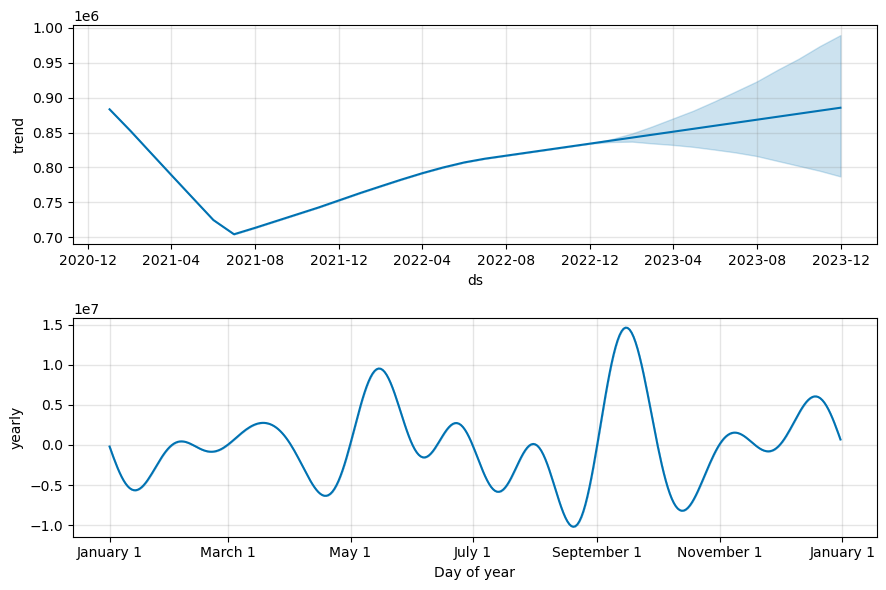

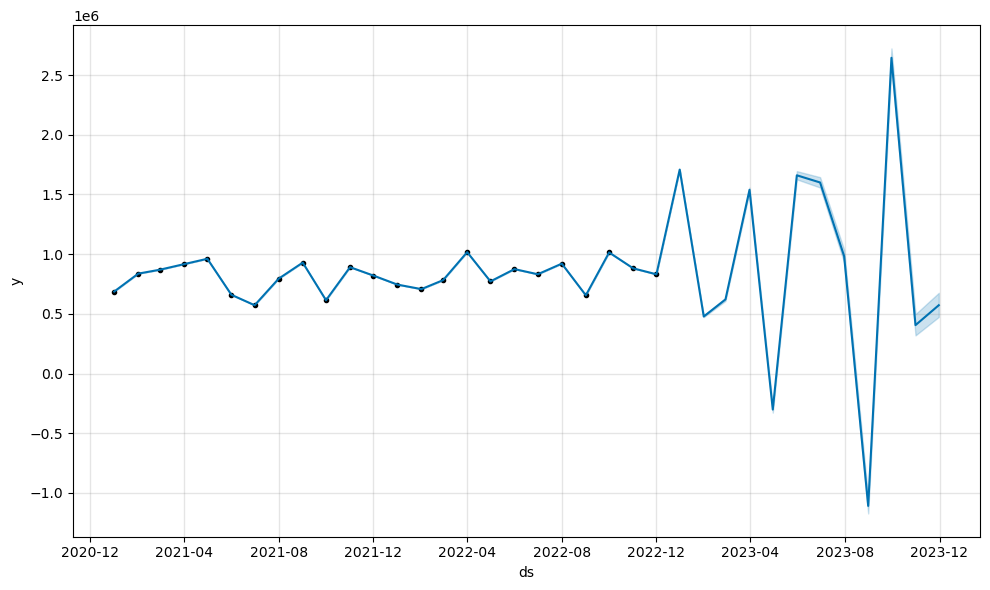

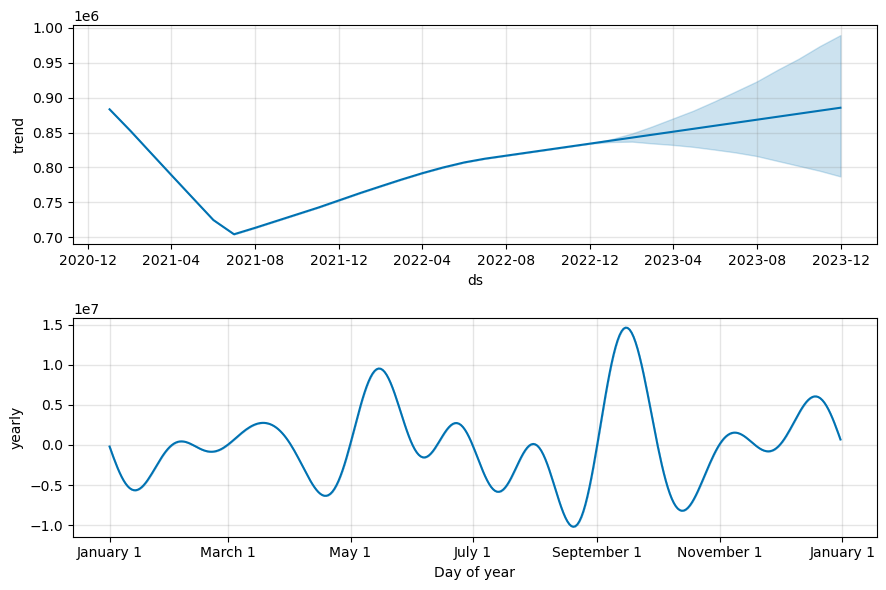

In [121]:
model.plot(forecast)
model.plot_components(forecast)

In [122]:
display(forecast)

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 148, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d92a5ae3-2e4b-47a1-9363-8a9cd709fe15)

In [123]:
spark.createDataFrame(forecast).write.saveAsTable('sales_forcast', mode='overwrite')

StatementMeta(, cae631a1-3672-400f-baaa-7c0ea39fec95, 149, Finished, Available, Finished)

![semantic link diagram](https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png)
![matrix full circle](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExN3piendvaXJyMDdhcjJxdHkyanQzemhtM2s1YjBkMjBqdGl1eG9pdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/eIm624c8nnNbiG0V3g/giphy.webp) ![mind blown](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2IwazlwY2tlbXBkMGhwaGx2dzRzeXJ1aHRiZDl6YmU4aThuNWJ1cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/V0IdVIIW1y5d6/giphy.webp)

## Resources
##### sempy documentation here [Sempy](https://semantic-link-labs.readthedocs.io/en/stable/modules.html)
##### semantic link labs [github](https://github.com/microsoft/semantic-link-labs)